Давыдов ПИм-231 лаба 2

Кластерный анализ (метод К-средних):

1) загрузите данные из прилагаемого архива (там есть описание данных, данные для обучения и данные для тестирования).

2) Уберите в данных целевой признак.

3) Выполните нормализацию признаков.

4) Постройте дендограмму методом дальнего соседа - оцените предполагаемое количество кластеров. Совпадает ли это количество с заранее известным?

5) Используя метод главных компонент (PCA), осуществите понижение размерности данных. Визуализируйте данные в проекции на первые две главные компоненты. Сколько кластеров можно предположить по полученному рисунку?

6) Выполните понижение размерности методом t-SNE, отобразите результат. Что можно теперь сказать о количестве кластеров?

7) Используя метод "локтя" и метод К-средних определите оптимальное количество кластеров. Ответ обоснуйте.

8) На основе предыдущих пунктов создайте модель на основе метода К-средних с оптимальным количеством кластеров. Обучите на предоставленных данных.

9) Получите процентное соотношение верных ответов на тестовых данных.

10) BONUS: Попробуйте выполнить кластеризацию методом DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN

1) загрузите данные из прилагаемого архива (там есть описание данных, данные для обучения и данные для тестирования).

In [ ]:
first_csv = pd.read_csv('SurveyIncomplete.csv')
second_csv = pd.read_csv('CompleteResponses.csv')

combined_data = pd.concat([first_csv, second_csv], ignore_index=True)

2) Уберите в данных целевой признак.

In [ ]:
X = combined_data.drop('brand', axis=1)
y = combined_data['brand']

3) Выполните нормализацию признаков.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4) Постройте дендограмму методом дальнего соседа - оцените предполагаемое количество кластеров. Совпадает ли это количество с заранее известным?

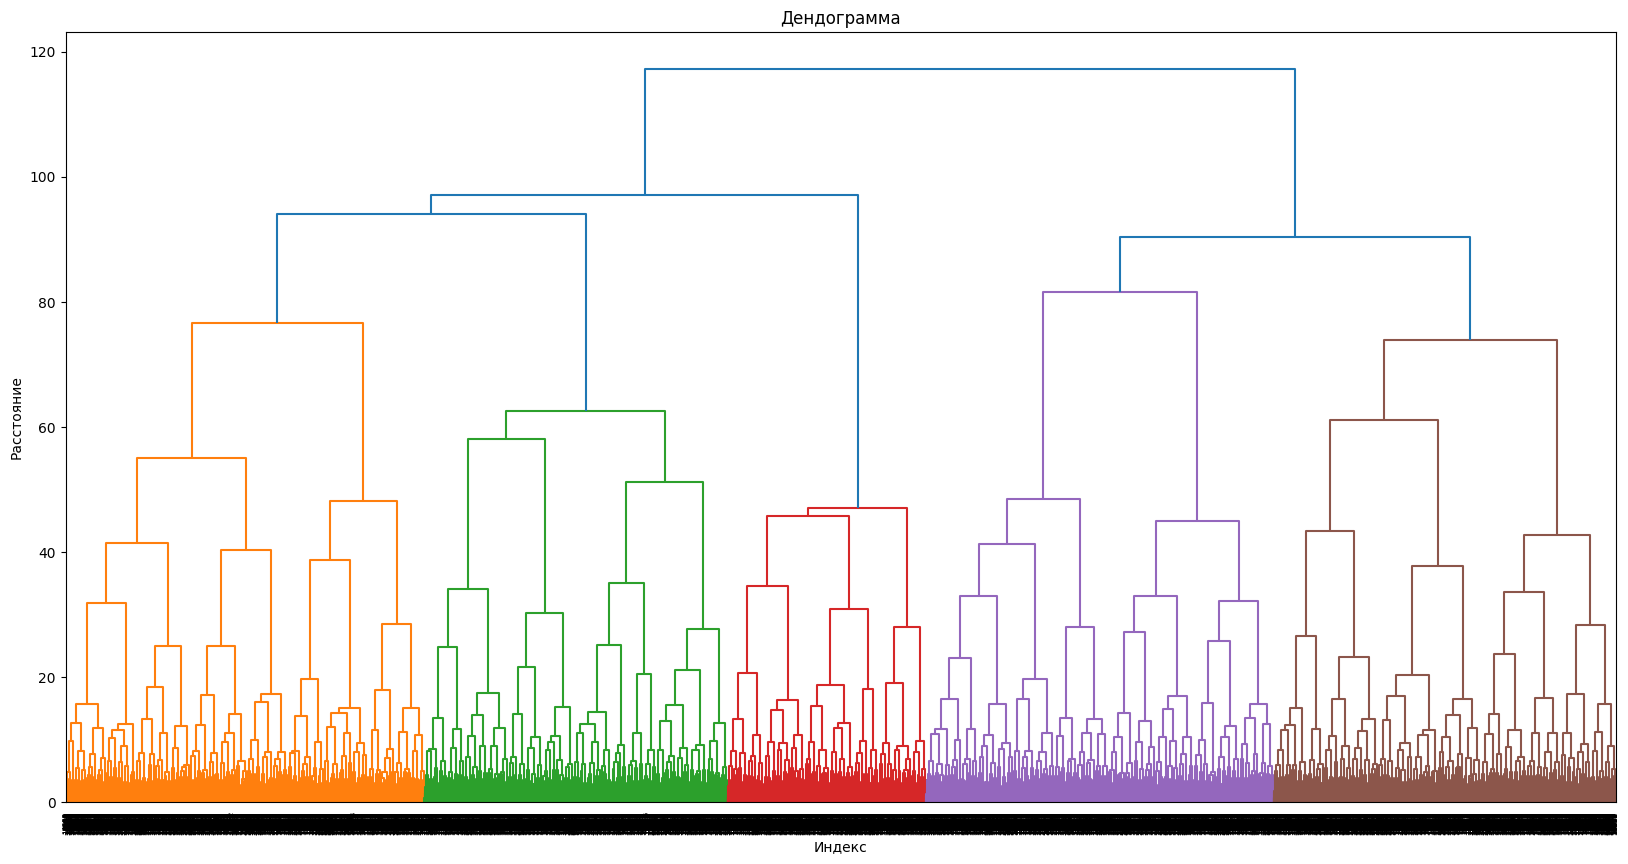

In [ ]:
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, p=30, truncate_mode='level', orientation='top', distance_sort='descending')
plt.title('Дендограмма')
plt.xlabel('Индекс')
plt.ylabel('Расстояние')
plt.show()

5) Используя метод главных компонент (PCA), осуществите понижение размерности данных. Визуализируйте данные в проекции на первые две главные компоненты. Сколько кластеров можно предположить по полученному рисунку?

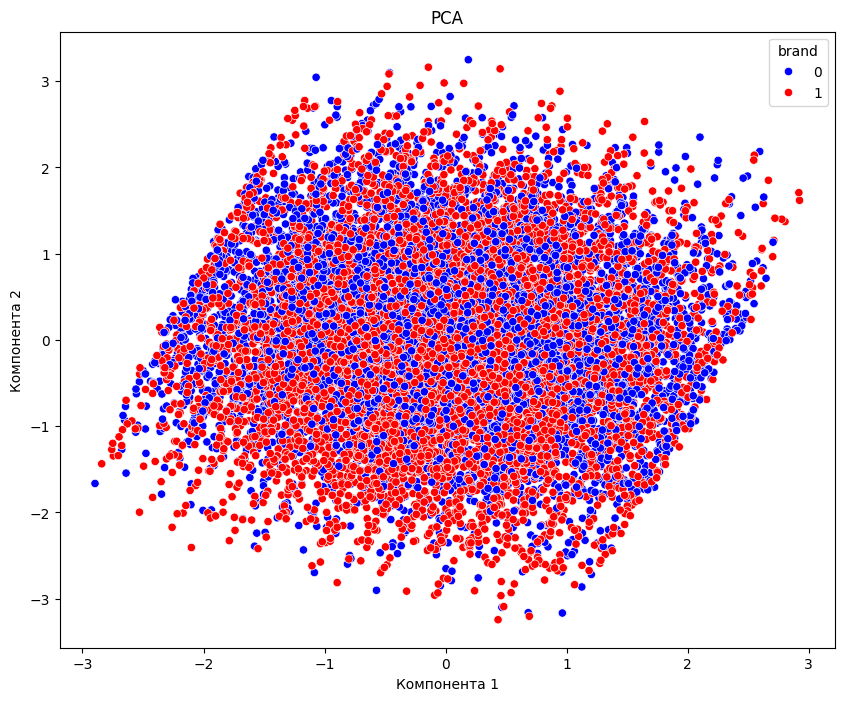

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'])
plt.title('PCA')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.show()

6) Выполните понижение размерности методом t-SNE, отобразите результат. Что можно теперь сказать о количестве кластеров?

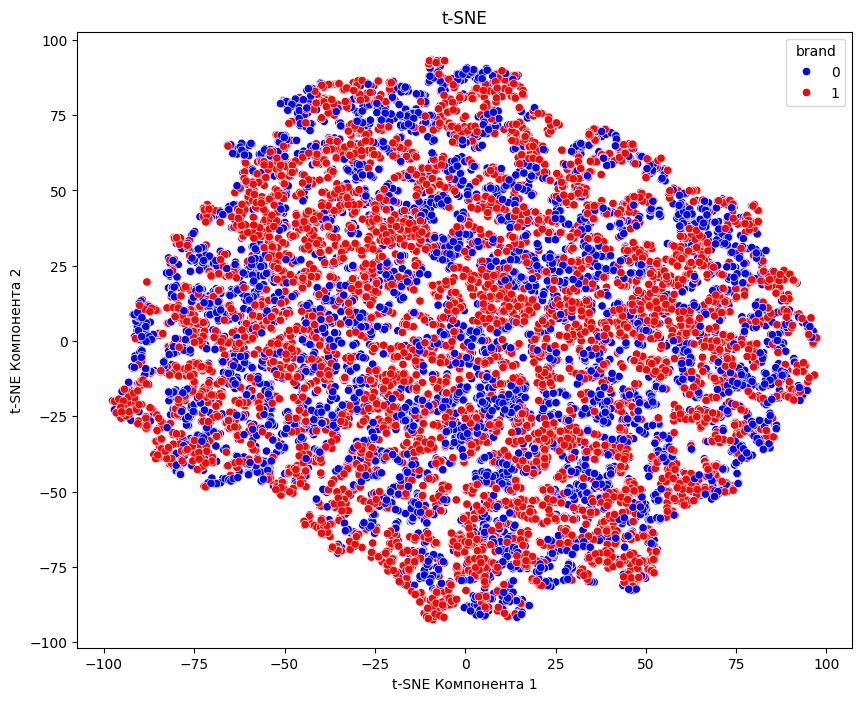

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=['blue', 'red'])
plt.title('t-SNE')
plt.xlabel('t-SNE Компонента 1')
plt.ylabel('t-SNE Компонента 2')
plt.show()

7) Используя метод "локтя" и метод К-средних определите оптимальное количество кластеров. Ответ обоснуйте.

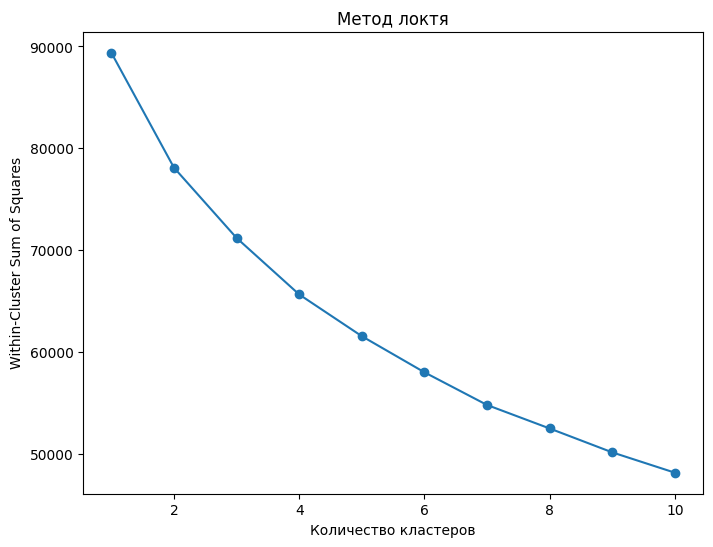

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

8) На основе предыдущих пунктов создайте модель на основе метода К-средних с оптимальным количеством кластеров. Обучите на предоставленных данных

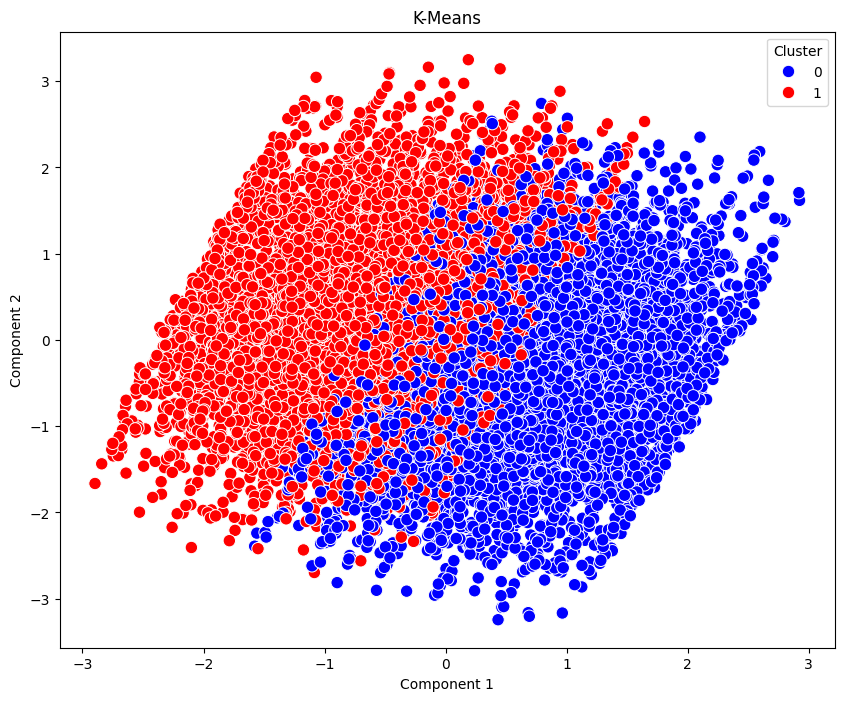

In [ ]:
optimal_clusters =  2

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

combined_data['cluster_labels'] = kmeans.labels_
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=combined_data['cluster_labels'], palette=['blue', 'red'], s=80)
plt.title('K-Means')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

9) Получите процентное соотношение верных ответов на тестовых данных

In [ ]:
accuracy = accuracy_score(y, combined_data['brand'])
print(f'Процентное соотношение: {accuracy * 100:.2f}%')

Процентное соотношение: 100.00%
